In [1]:
# my_notebook.ipynb

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
scripts_dir = os.path.abspath("../scripts") 
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Now you can import modules from the scripts directory
from db_connection import connect_to_database

conn = connect_to_database()

In [3]:
sql_query = """
SELECT * FROM xdr_data
"""




In [4]:
# Execute the SQL query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)
df


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\123498240.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
df.shape

(150001, 55)

In [6]:
df.columns.tolist()



['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the null percentage for each column
null_percentage


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [9]:
df.shape

(150001, 55)

In [10]:
missingCount = df.isnull().sum()
missingCount



Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(150001, 55)

In [13]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom Data contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Telecom Data contains 12.5 % missing values.


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\1710861280.py:15: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  percent_missing(df)


In [14]:
df.shape

(150001, 55)

In [15]:
df = df.drop(df.columns[31:37].tolist() + ['HTTP DL (Bytes)', 'HTTP UL (Bytes)'], axis=1)



In [16]:
df.shape

(150001, 47)

In [17]:
missingCount = df.isnull().sum()
missingCount

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1


In [18]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the null percentage for each column
null_percentage


Bearer Id                          0.660662
Start                              0.000667
Start ms                           0.000667
End                                0.000667
End ms                             0.000667
Dur. (ms)                          0.000667
IMSI                               0.379997
MSISDN/Number                      0.710662
IMEI                               0.381331
Last Location Name                 0.768662
Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Avg Bearer TP DL (kbps)            0.000667
Avg Bearer TP UL (kbps)            0.000667
TCP DL Retrans. Vol (Bytes)       58.763608
TCP UL Retrans. Vol (Bytes)       64.432237
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
UL TP < 10 Kbps (%)                0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
50 Kbps < UL TP < 300 Kbps (%)  

In [19]:
df.shape

(150001, 47)

In [20]:
df.shape

(150001, 47)

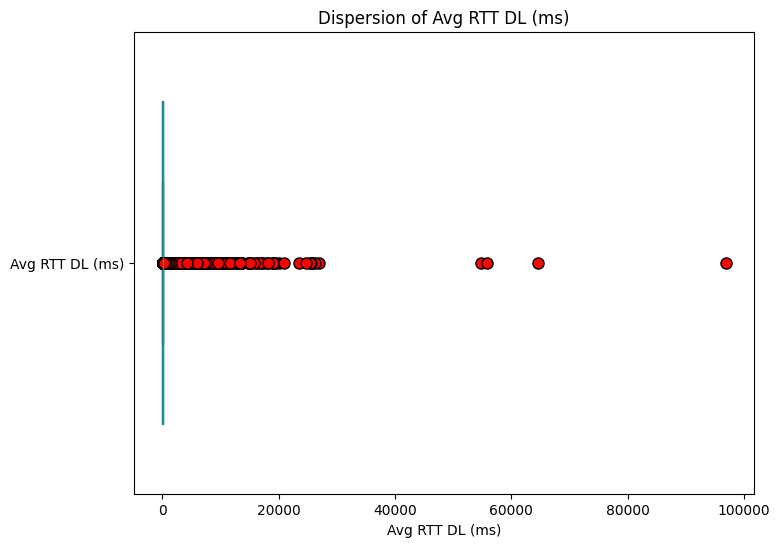

In [21]:
# Select the "Avg RTT DL (ms)" column
avg_rtt_dl_data = df['Avg RTT DL (ms)']

# Create a box plot to visualize the dispersion of the data
plt.figure(figsize=(8, 6))
avg_rtt_dl_data.plot(kind='box', vert=False, widths=0.7, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))

# Add a title and labels
plt.title('Dispersion of Avg RTT DL (ms)')
plt.xlabel('Avg RTT DL (ms)')
plt.show()


In [22]:
df['Avg RTT DL (ms)'].fillna(method='ffill', inplace=True)


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\4094211614.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Avg RTT DL (ms)'].fillna(method='ffill', inplace=True)


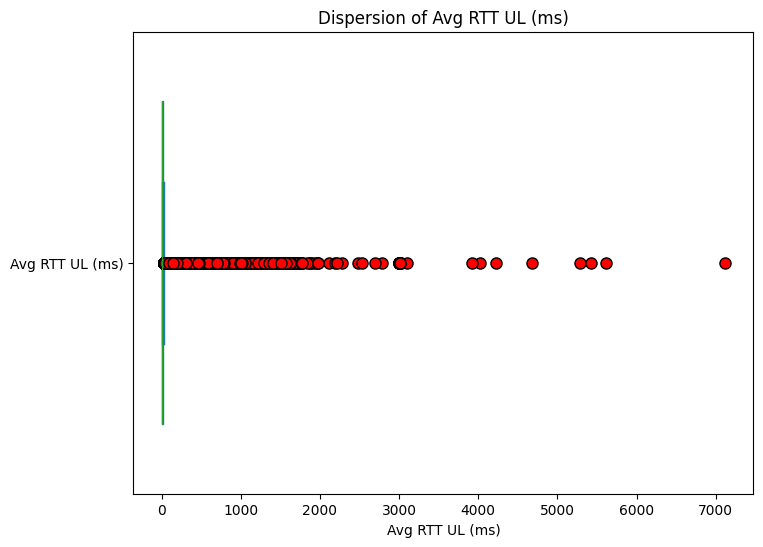

In [23]:
# Select the "Avg RTT DL (ms)" column
avg_rtt_dl_data = df['Avg RTT UL (ms)']

# Create a box plot to visualize the dispersion of the data
plt.figure(figsize=(8, 6))
avg_rtt_dl_data.plot(kind='box', vert=False, widths=0.7, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))

# Add a title and labels
plt.title('Dispersion of Avg RTT UL (ms)')
plt.xlabel('Avg RTT UL (ms)')
plt.show()


In [24]:
# Fill the null values with the backward fill method 
df['Avg RTT UL (ms)'].fillna(method='bfill', inplace=True)


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\2196176513.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Avg RTT UL (ms)'].fillna(method='bfill', inplace=True)


In [25]:
# Check for missing values in the "Avg RTT DL (ms)" column
missing_values = df['Avg RTT DL (ms)'].isnull().sum()
print("Number of missing values in 'Avg RTT DL (ms)':", missing_values)


Number of missing values in 'Avg RTT DL (ms)': 0


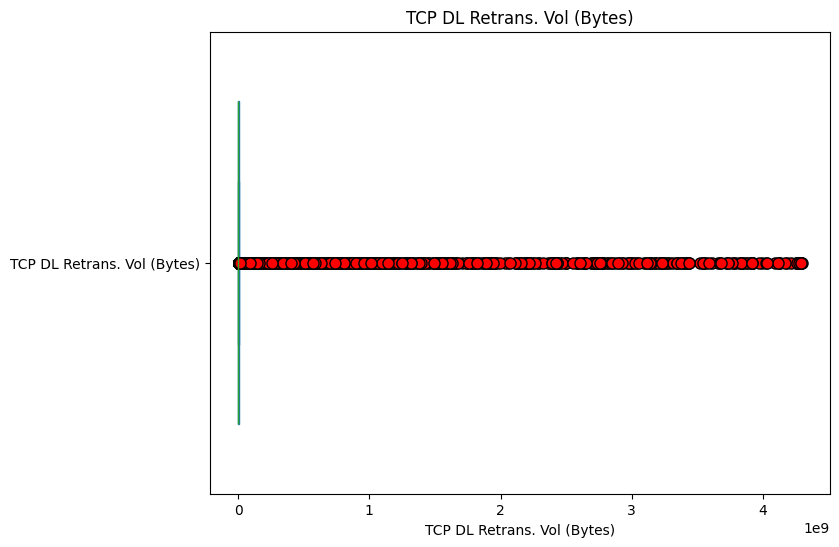

In [26]:
 
# Select the "Avg RTT DL (ms)" column
avg_rtt_dl_data = df['TCP DL Retrans. Vol (Bytes)']

# Create a box plot to visualize the dispersion of the data
plt.figure(figsize=(8, 6))
avg_rtt_dl_data.plot(kind='box', vert=False, widths=0.7, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))

# Add a title and labels
plt.title('TCP DL Retrans. Vol (Bytes)')
plt.xlabel('TCP DL Retrans. Vol (Bytes)')
plt.show()

In [27]:
df['TCP DL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
df['TCP DL Retrans. Vol (Bytes)'].fillna(method='bfill', inplace=True)


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\445891709.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TCP DL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\445891709.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TCP DL Retrans. Vol (Bytes)'].fillna(method='bfill', inplace=True)


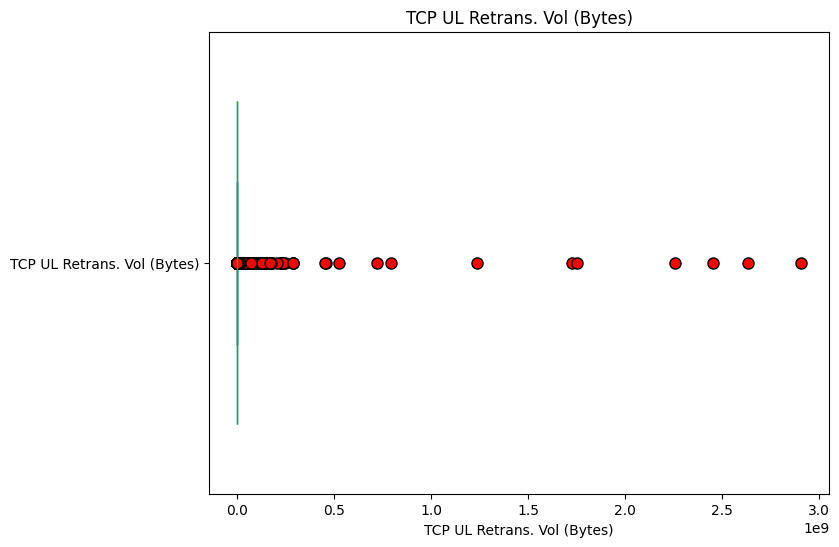

In [28]:
# Select the "Avg RTT DL (ms)" column
avg_rtt_dl_data = df['TCP UL Retrans. Vol (Bytes)']

# Create a box plot to visualize the dispersion of the data
plt.figure(figsize=(8, 6))
avg_rtt_dl_data.plot(kind='box', vert=False, widths=0.7, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))

# Add a title and labels
plt.title('TCP UL Retrans. Vol (Bytes)')
plt.xlabel('TCP UL Retrans. Vol (Bytes)')
plt.show()

In [29]:
df['TCP UL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(method='bfill', inplace=True)


C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\4111183371.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TCP UL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
C:\Users\Nole\AppData\Local\Temp\ipykernel_22880\4111183371.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TCP UL Retrans. Vol (Bytes)'].fillna(method='bfill', inplace=True)


In [30]:
missingCount = df.isnull().sum()
missingCount

Bearer Id                          991
Start                                1
Start ms                             1
End                                  1
End ms                               1
Dur. (ms)                            1
IMSI                               570
MSISDN/Number                     1066
IMEI                               572
Last Location Name                1153
Avg RTT DL (ms)                      0
Avg RTT UL (ms)                      1
Avg Bearer TP DL (kbps)              1
Avg Bearer TP UL (kbps)              1
TCP DL Retrans. Vol (Bytes)          0
TCP UL Retrans. Vol (Bytes)          0
DL TP < 50 Kbps (%)                754
50 Kbps < DL TP < 250 Kbps (%)     754
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
Activity Duration DL (ms)            1
Activity Duration UL (ms)

In [31]:
df.shape

(150001, 47)

# to drop  all the rows with missing values

In [32]:
df.dropna(subset=['Bearer Id'], inplace=True)

In [33]:
df.dropna(subset=['IMSI'], inplace=True)

In [34]:
df.dropna(subset=['MSISDN/Number'], inplace=True)

In [35]:
df.dropna(subset=['IMEI'], inplace=True)

In [36]:
df.dropna(subset=['Last Location Name'], inplace=True)

In [37]:
missingCount = df.isnull().sum()
missingCount


Bearer Id                           0
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                  0
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
TCP DL Retrans. Vol (Bytes)         0
TCP UL Retrans. Vol (Bytes)         0
DL TP < 50 Kbps (%)               688
50 Kbps < DL TP < 250 Kbps (%)    688
250 Kbps < DL TP < 1 Mbps (%)     688
DL TP > 1 Mbps (%)                688
UL TP < 10 Kbps (%)               765
10 Kbps < UL TP < 50 Kbps (%)     765
50 Kbps < UL TP < 300 Kbps (%)    765
UL TP > 300 Kbps (%)              765
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms).1 

In [38]:
df.shape

(148346, 47)

In [39]:
# Assuming df is your DataFrame
cleaned_df = df.dropna()


In [40]:
# Calculate the percentage of null values in each column
null_percentage = cleaned_df.isnull().mean() * 100

# Display the null percentage for each column
null_percentage


Bearer Id                         0.0
Start                             0.0
Start ms                          0.0
End                               0.0
End ms                            0.0
Dur. (ms)                         0.0
IMSI                              0.0
MSISDN/Number                     0.0
IMEI                              0.0
Last Location Name                0.0
Avg RTT DL (ms)                   0.0
Avg RTT UL (ms)                   0.0
Avg Bearer TP DL (kbps)           0.0
Avg Bearer TP UL (kbps)           0.0
TCP DL Retrans. Vol (Bytes)       0.0
TCP UL Retrans. Vol (Bytes)       0.0
DL TP < 50 Kbps (%)               0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
DL TP > 1 Mbps (%)                0.0
UL TP < 10 Kbps (%)               0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
UL TP > 300 Kbps (%)              0.0
Activity Duration DL (ms)         0.0
Activity Duration UL (ms)         0.0
Dur. (ms).1 

In [41]:
cleaned_df.shape

(146891, 47)

In [42]:
cleaned_df.to_csv('C:\\Users\\Nole\\Desktop\\Teleco\\Notebook\\Cleaned_data_csv\\cleaned_data.csv', index=False)


In [43]:


# Load the saved CSV file into a new DataFrame
new_df = pd.read_csv('C:\\Users\\Nole\\Desktop\\Teleco\\Notebook\\Cleaned_data_csv\\cleaned_data.csv')

# Now you can use the new_df DataFrame for further analysis in pandas


In [44]:
new_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (B

In [45]:
new_df.shape

(146891, 47)

In [46]:
# Calculate the percentage of null values in each column
null_percentage = new_df.isnull().mean() * 100

# Display the null percentage for each column
null_percentage


Bearer Id                         0.0
Start                             0.0
Start ms                          0.0
End                               0.0
End ms                            0.0
Dur. (ms)                         0.0
IMSI                              0.0
MSISDN/Number                     0.0
IMEI                              0.0
Last Location Name                0.0
Avg RTT DL (ms)                   0.0
Avg RTT UL (ms)                   0.0
Avg Bearer TP DL (kbps)           0.0
Avg Bearer TP UL (kbps)           0.0
TCP DL Retrans. Vol (Bytes)       0.0
TCP UL Retrans. Vol (Bytes)       0.0
DL TP < 50 Kbps (%)               0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
DL TP > 1 Mbps (%)                0.0
UL TP < 10 Kbps (%)               0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
UL TP > 300 Kbps (%)              0.0
Activity Duration DL (ms)         0.0
Activity Duration UL (ms)         0.0
Dur. (ms).1 